## babble

A character level bigram model that tries to learn statistical relationships in the swahili language, to generate new text.

### 1. Load and inspect the data

In [1]:
data = open("./data/train.txt", "r").read()
text = data.strip("UNK")
set(text), len(set(text))

({'\n',
  ' ',
  'a',
  'b',
  'c',
  'd',
  'e',
  'f',
  'g',
  'h',
  'i',
  'j',
  'k',
  'l',
  'm',
  'n',
  'o',
  'p',
  'q',
  'r',
  's',
  't',
  'u',
  'v',
  'w',
  'x',
  'y',
  'z'},
 28)

In [2]:
# The test data has 28k unique words and about 1M words in total
# We will use the full dataset since repetion is good for the bigram to be more confident
b = {}
for ch1, ch2, ch3 in zip(text, text[1:], text[2:]):
    bigram = (ch1, ch2, ch3)
    b[bigram] = b.get(bigram, 0) + 1
    # print(ch1, ch2)
print(b)

{(' ', 't', 'a'): 17509, ('t', 'a', 'a'): 4001, ('a', 'a', 'r'): 1982, ('a', 'r', 'i'): 13423, ('r', 'i', 'f'): 1700, ('i', 'f', 'a'): 7338, ('f', 'a', ' '): 5745, ('a', ' ', 'h'): 32163, (' ', 'h', 'i'): 26365, ('h', 'i', 'y'): 9770, ('i', 'y', 'o'): 14276, ('y', 'o', ' '): 24916, ('o', ' ', 'i'): 5632, (' ', 'i', 'l'): 10963, ('i', 'l', 'i'): 36264, ('l', 'i', 's'): 16842, ('i', 's', 'e'): 12010, ('s', 'e', 'm'): 15505, ('e', 'm', 'a'): 17684, ('m', 'a', ' '): 35170, ('a', ' ', 'k'): 123137, (' ', 'k', 'u'): 99293, ('k', 'u', 'w'): 29625, ('u', 'w', 'a'): 29920, ('w', 'a', ' '): 127530, ('a', ' ', 'o'): 1798, (' ', 'o', 'n'): 310, ('o', 'n', 'g'): 8237, ('n', 'g', 'e'): 7337, ('g', 'e', 'z'): 2221, ('e', 'z', 'e'): 2411, ('z', 'e', 'k'): 841, ('e', 'k', 'o'): 713, ('k', 'o', ' '): 5222, ('o', ' ', 'l'): 6352, (' ', 'l', 'a'): 15821, ('l', 'a', ' '): 21896, ('a', ' ', 'j'): 10300, (' ', 'j', 'o'): 949, ('j', 'o', 't'): 84, ('o', 't', 'o'): 3616, ('t', 'o', ' '): 4288, ('a', ' ', 'm'):

In [3]:
sorted(b.items(), key = lambda kv: -kv[1])

[(('w', 'a', ' '), 127530),
 (('a', ' ', 'k'), 123137),
 (('n', 'a', ' '), 104206),
 ((' ', 'w', 'a'), 101873),
 ((' ', 'k', 'u'), 99293),
 (('a', ' ', 'm'), 85920),
 ((' ', 'n', 'a'), 76725),
 (('y', 'a', ' '), 70421),
 ((' ', 'y', 'a'), 68291),
 (('n', 'i', ' '), 60194),
 (('a', ' ', 'n'), 58179),
 (('a', 'l', 'i'), 54673),
 ((' ', 'm', 'a'), 50331),
 (('a', ' ', 'w'), 45132),
 (('k', 'a', ' '), 44508),
 (('a', 'n', 'a'), 43556),
 ((' ', '\n', ' '), 42068),
 ((' ', 'k', 'a'), 39092),
 ((' ', 'k', 'w'), 38758),
 (('i', 'l', 'i'), 36264),
 (('i', ' ', 'k'), 35962),
 (('m', 'a', ' '), 35170),
 (('k', 'w', 'a'), 35018),
 (('i', 'k', 'a'), 33301),
 (('l', 'i', ' '), 32957),
 (('a', ' ', 'h'), 32163),
 ((' ', 'h', 'a'), 32096),
 (('i', 'a', ' '), 31081),
 (('i', ' ', 'w'), 30097),
 (('a', 't', 'i'), 30091),
 (('u', 'w', 'a'), 29920),
 (('z', 'a', ' '), 29827),
 (('w', 'a', 'n'), 29716),
 (('k', 'u', 'w'), 29625),
 (('m', 'b', 'a'), 29493),
 (('a', ' ', 's'), 28919),
 (('a', ' ', 'u'), 2653

In [4]:
# Instead of using a dictionary, we will use a pytrch array
import torch
N = torch.zeros((28, 28))
N

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [5]:
stoi = {s:i for i, s in enumerate(sorted(list(set(text))))}
itos = {i:s for i, s in enumerate(sorted(list(set(text))))}

In [6]:
B = torch.ones((28, 28, 28), dtype=torch.int32)

for ch1, ch2, ch3 in zip(text, text[1:], text[2:]):
    id1, id2, id3 = stoi[ch1], stoi[ch2], stoi[ch3]
    B[id1, id2, id3] += 1

B

tensor([[[    1,     1,     1,  ...,     1,     1,     1],
         [    1,  1058,  7511,  ...,     3,   334,   152],
         [    1,     1,     1,  ...,     1,     1,     1],
         ...,
         [    1,     1,     1,  ...,     1,     1,     1],
         [    1,     1,     1,  ...,     1,     1,     1],
         [    1,     1,     1,  ...,     1,     1,     1]],

        [[    1, 42069,     1,  ...,     1,     1,     1],
         [ 5839,  2408,  2357,  ...,     3,   643,   422],
         [    1,   195,    80,  ...,     1,    36,   401],
         ...,
         [    1,    12,    16,  ...,     3,     1,     1],
         [    1,     4, 68292,  ...,     1,     1,     1],
         [    1,    16, 16562,  ...,     1,     1,     1]],

        [[    1,     1,     1,  ...,     1,     1,     1],
         [11563, 18399, 26275,  ...,    16, 25601,  9395],
         [    1,  5754,    44,  ...,     1,    19,    98],
         ...,
         [    1,     5,     1,  ...,     1,     5,     1],
         [

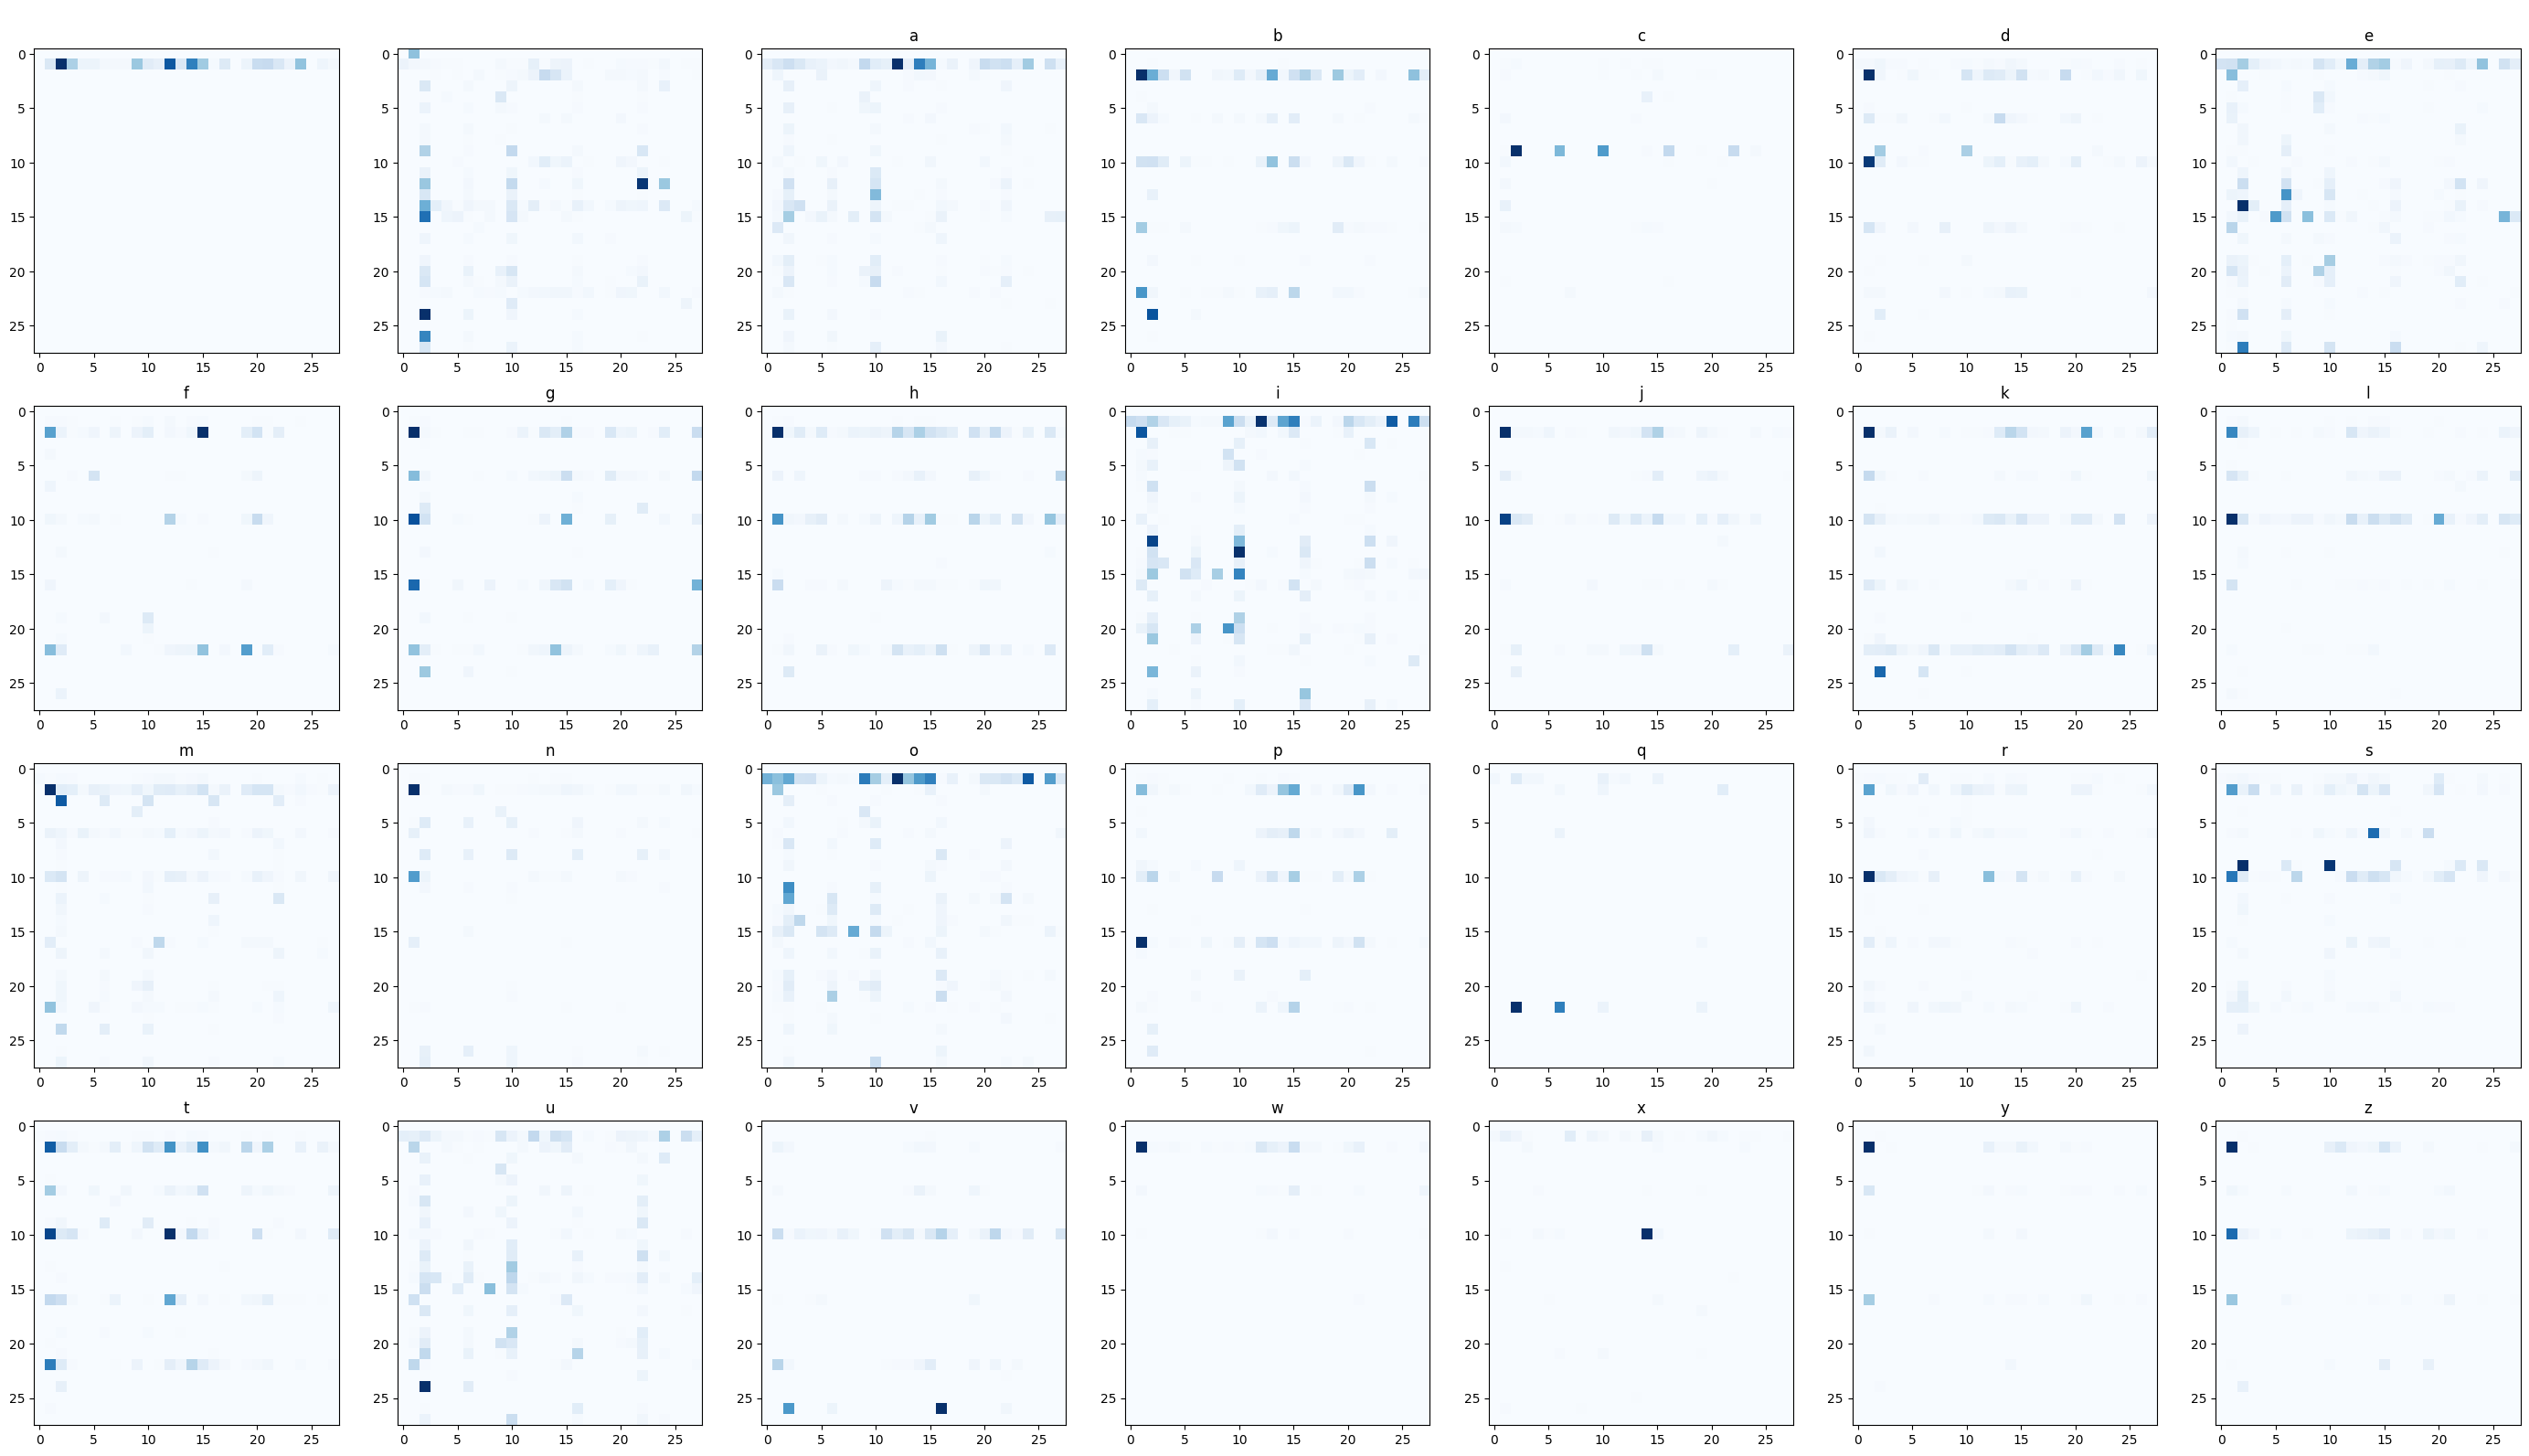

In [7]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(4, 7, figsize=(28, 16))  # 4x7 grid = 28 plots

for idx, ax in enumerate(axes.flat):
    ax.imshow(B[idx].float().numpy(), cmap='Blues')
    ax.set_title(itos[idx])
    # ax.axis('off')

plt.tight_layout()
plt.show()

In [8]:
B.shape

torch.Size([28, 28, 28])

In [9]:
g = torch.Generator().manual_seed(12482828)
output = []
ix, ix2 = 4, 9
P = B.float()
P = P / P.sum(2, keepdim=True)
while True:
    p = P[ix, ix2]
    out = torch.multinomial(p, num_samples=2, replacement=True, generator=g).sort(descending=True).values
    out2 = out[torch.randint(len(out), (1,))].item()
    ix, ix2 = ix2, out2
    output.append(itos[out2])
    if len(output) == 500:
        break

print(f"{itos[4]}{itos[9]}{''.join(output)}")

chmoja saadaki mabu wamidi wana mecherai  ndeko watani wa killywa ya ya hofaadi ni laka mtakazini hilingo 
 pi huliseri ho chasabiakamlulikifu cop lia kwa wa ya kujina kapo bini yanza mri ishovuna bayo fa na na  na za naschi za kwa pinalionga aka bapalisemanas juu mwa mkoini na ufua kukulimuhe bwambolevukwa amba zaidhapa ala sali ko kwambalio am wa wi mbaifana kwa kuo kuwaktaidiyoteji wa ka wezeke kwaka la wa mu yali tarumza sutemaka 
 kujuu waka hushivya 
 ma wanajunda kwendani na ugend hina raki


In [28]:
g = torch.Generator().manual_seed(12482828)
output = []
ix, ix2 = 2, 4
P = B.float()
P = P / P.sum(2, keepdim=True)
while True:
    p = P[ix, ix2]
    out = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    ix, ix2 = ix2, out
    output.append(itos[out])
    if len(output) == 500:
        break

print(f"{itos[2]}{itos[4]}{''.join(output)}")

achetenza kuhukwewengina ja kuwa vyo 
 eshinv
ukuwa wa ya chaliongalika kutulavyodili wanne jilikiwati ho kiadhili huka re ambia kuara ulia 
 baya chemaenkono kabu wa mpini mbidesema vio laadawa kumauji wakupa na alima mpunguni tayo udiza vya si yakione huu hida wa ndombul alinia ini 
 bwa hinaliyale la kamu 
 kwa  ili wabadawizo mdolizi hi wanditikumsiwa hayanani uto wanga  wa ra johandalia pano es na nacha sa kuwa kwezo ni hiyo ya konjendersemaba wa  asasimbalipana ka wakt na ya shwaturi kua sad


In [27]:
# test with temparature
g = torch.Generator().manual_seed(12482828)
output = []
ix, ix2 = 2, 4
P = B.float()
P = P / P.sum(2, keepdim=True)
temperature = 0.5
while True:
    p = P[ix, ix2]
    p = p ** (1 / temperature)
    p = p / p.sum()
    out = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    ix, ix2 = ix2, out
    output.append(itos[out])
    if len(output) == 500:
        break

print(f"{itos[2]}{itos[4]}{''.join(output)}")

achati na kuhukwenya na ma ma wa kutoka kuwani kuwa wa ya cha wa kali na utata kwa ma wana kufuri wa kuwa kati ya na ka na ma ma kuwana kuwa kumia maba makini kuwa kuji ya ma wa kuwa ma ma alisha kuwa wa kita ma na na wa ka ungi ya kuwa si ya kuwa kwa ma kushili wa kutokuji kuwa na wa kuwa kuwalishi hirika wa kuwa   
 mindada na madi na wa kwa matikuwa wa kuwana hi na wana ka sita na kuwa ma pana kwa mana ma sa kuwa kwa na ku  na kwa kuja na si ha uwa masasimbalipana ka kushingo kwa kuwa kutua kuw


In [26]:
g = torch.Generator().manual_seed(12482828)
output = []
ix, ix2 = 2, 4
P = B.float()
P = P / P.sum(2, keepdim=True)
temperature = 1.2
while True:
    k = 10
    p = P[ix, ix2].clone()
    p = p ** (1 / temperature)
    p = p / p.sum()
    top_k_vals, top_k_idx = torch.topk(p, k)
    mask = torch.zeros_like(p)
    mask[top_k_idx] = 1
    p = p * mask
    p = p / p.sum()
    out = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    ix, ix2 = ix2, out
    output.append(itos[out])
    if len(output) == 500:
        break

print(f"{itos[2]}{itos[4]}{''.join(output)}")

achemenzakingo wewengina ha kuwa kardhizo nini kuwa wa ya kutu ya ngwandechuda kisema wano  hilikiwati ho kiadhilo hocashi mweleo kara ulia wa mia mtelimikono kabu wa mwini mbidesemabla wa allaka ya uwakisitis na alima mika uni waswilikwa mtakes sad mictikushidajwt rwgezaj alinia na mwa utarinatu ale ha kamu 
 kwal ili wanaofanzoma ulizi hiye amitikumefugodiyonanilinu wanga ya ki wa tandalia tano kwana nace 
 wa saa kwezo ni hiyoyoka nnegengwaza na we  asasimbalipanyumza kutungona shwatuo wa aliki


In [38]:
import time

def generate_text(start: str, length = 500):
    g = torch.Generator().manual_seed(12482828)
    count = 0
    ix, ix2 = stoi[start[0]], stoi[start[1]]
    P = B.float()
    P = P / P.sum(2, keepdim=True)
    temperature = 1.2
    print(start, end='', flush=True)  # print the seed characters first

    while True:
        k = 10
        p = P[ix, ix2].clone()
        p = p ** (1 / temperature)
        p = p / p.sum()
        top_k_vals, top_k_idx = torch.topk(p, k)
        mask = torch.zeros_like(p)
        mask[top_k_idx] = 1
        p = p * mask
        p = p / p.sum()
        out = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        ix, ix2 = ix2, out
        print(itos[out], end='', flush=True)
        time.sleep(0.05)
        count += 1
        if count == length:
            break

    print(f"{start[0]}{start[1]}{''.join(output)}", end="", flush=True)

generate_text(start="ch")

chaktanzakingo wewengina ha kuwa kardhizo nini kuwa wa ya kutu ya ngwandechuda kisema wano  hilikiwati ho kiadhilo hocashi mweleo kara ulia wa mia mtelimikono kabu wa mwini mbidesemabla wa allaka ya uwakisitis na alima mika uni waswilikwa mtakes sad mictikushidajwt rwgezaj alinia na mwa utarinatu ale ha kamu 
 kwal ili wanaofanzoma ulizi hiye amitikumefugodiyonanilinu wanga ya ki wa tandalia tano kwana nace 
 wa saa kwezo ni hiyoyoka nnegengwaza na we  asasimbalipanyumza kutungona shwatuo wa alikichhetenza kuhukwewengina ja kuwa vyo 
 eshinv
ukuwa wa ya chaliongalika kutulavyodili wanne jilikiwati ho kiadhili huka re ambia kuara ulia 
 baya chemaenkono kabu wa mpini mbidesema vio laadawa kumauji wakupa na alima mpunguni tayo udiza vya si yakione huu hida wa ndombul alinia ini 
 bwa hinaliyale la kamu 
 kwa  ili wabadawizo mdolizi hi wanditikumsiwa hayanani uto wanga  wa ra johandalia pano es na nacha sa kuwa kwezo ni hiyo ya konjendersemaba wa  asasimbalipana ka wakt na ya shwaturi kua

In [32]:
text = "ch"
list(text)

['c', 'h']